In [153]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root, root_scalar

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] ='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15

# Circulation
## Mathematical physiology II, chapter 11
IBM3101 - Francisco Sahli

In [154]:
def plotPVloop(Vh, Cd, Cs, Pv, Pa, Q):
    Vmin = 10.0
    Vmax = Vmin + Vh

    P = np.linspace(0,140, 100)
    VED = Vmax + Cd*P
    VES = Vmin + Cs*P

    plt.plot(VED, P,'k')
    plt.plot(VES, P,'k')
    plt.xlim([0,160])


    Ved = Vmax + Cd*Pv
    Ves = Vmin + Cs*Pa

    plt.plot([Ved, Ves], [Pv, Pv],'k')
    plt.plot([Ved, Ves], [Pa, Pa],'k')
    plt.plot([Ved, Ved], [Pv, Pa],'k')
    plt.plot([Ves, Ves], [Pv, Pa],'k')

    plt.xlabel('Volume [mL]')
    plt.ylabel('Pressure [mmHg]')
    plt.title('Q = %.1f [mL/min]' % Q)

Q baseline 4853.770147360675
Q modified 4853.770147360675


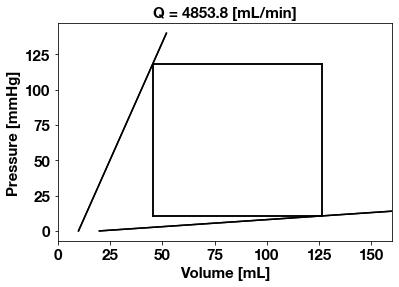

In [155]:
def circmodelinv(Y, F, V0, Vh, Vheart, Pa, Pv, V, Q):
    R, gamma = Y
    Cd = 10.
    Cs = 0.3
    Qvessel = 1/(3*R*gamma)*((1 + gamma*Pa)**3 - (1 + gamma*Pv)**3)
    Vstroke = (Vh + Cd*Pv - Cs*Pa)
    Qheart = F*Vstroke
    eq1 = Q - Qvessel
    eq2 = V - 3/4*((1 + gamma*Pa)**4 - (1 + gamma*Pv)**4)/((1 + gamma*Pa)**3 - (1 + gamma*Pv)**3)*V0
    eq3 = V - V0 - Vheart
    eq4 = Q - Qheart
    return [eq1, eq2]

Y0 = [0.01, .001]

V0 = 6000 # mL
Vh = 10 # mL
Pa = 120 # mmHg
Pv = 9 # mmHg
Vstroke = 60 # mL
Vheart = 60 # mL
V = V0 + Vstroke
Q = 5000 # mL/minute
F = 60 # beats/minute

sol = root(circmodelinv, Y0, args = (F, V0, Vh, Vheart, Pa, Pv, V, Q))
    
R, gamma = sol.x   


def circmodel(Y, F, V0, Vh, Vheart, R, gamma, Cd, Cs):
    Pa, Pv, V, Q = Y
    Qvessel = 1/(3*R*gamma)*((1 + gamma*Pa)**3 - (1 + gamma*Pv)**3)
    Vstroke = (Vh + Cd*Pv - Cs*Pa)
    Qheart = F*Vstroke
    Ved = 30 + Cd*Pv
    Ves = 10 + Cs*Pa
    eq1 = Q - Qvessel
    eq2 = V - 3/4*((1 + gamma*Pa)**4 - (1 + gamma*Pv)**4)/((1 + gamma*Pa)**3 - (1 + gamma*Pv)**3)*V0
    eq3 = V - 60 - V0
    eq4 = Qvessel - Qheart
    return [eq1, eq2, eq3, eq4]

Y0 = [120, 10., 6000.,5000.]


V0 = 6000 # mL
Vh = 10 # mL
Vheart = 60 # mL
Cd = 10
Cs = .3
F = 60 # beats/minute

sol = root(circmodel, Y0, args = (F, V0, Vh, Vheart, R, gamma, Cd, Cs))

Pa, Pv, V, Q = sol.x

plotPVloop(Vh, Cd, Cs, Pv, Pa, Q)

print('Q baseline', Q)

#gamma *= 2

sol = root(circmodel, Y0, args = (F, V0, Vh, Vheart, R, gamma, Cd, Cs))

Pa, Pv, V, Q = sol.x

plotPVloop(Vh, Cd, Cs, Pv, Pa, Q)

print('Q modified', Q)

- double the parameter `R` to simulate hypertension
- double the parameter `gamma` to simulate Arteriosclerosis